In [68]:
import pandas as pd 
import numpy as np
from sklearn.ensemble import IsolationForest 
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("listings.csv")

display(data.head())

print(data.dtypes)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,Hawaii,South Kohala,20.02740,-155.70200,Entire home/apt,149,3,16,2021-10-23,0.12,2,193,6,119-269-5808-01R
1,5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,Hawaii,South Kona,19.43081,-155.88069,Entire home/apt,85,5,186,2021-11-25,1.29,2,253,18,NaN
2,5389,Keauhou Villa,7878,Edward,Hawaii,North Kona,19.56604,-155.96199,Entire home/apt,299,6,32,2021-09-25,0.33,2,189,12,NaN
3,5434,Kauai Ocean View 3 Story Tiki Tower Princeville,7984,Ahlea,Kauai,North Shore Kauai,22.22080,-159.46989,Entire home/apt,425,2,134,2021-11-27,0.90,2,231,26,540050300023
4,5930,Poipu Beach Guest House - Orchid - SurfSong,10768,John,Kauai,Koloa-Poipu,21.88139,-159.47248,Private room,140,3,206,2021-12-01,1.54,4,120,27,260060100000


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'host_id'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'minimum_nights'}>],
       [<AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'reviews_per_month'}>,
        <AxesSubplot:title={'center':'calculated_host_listings_count'}>],
       [<AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:title={'center':'number_of_reviews_ltm'}>,
        <AxesSubplot:>]], dtype=object)

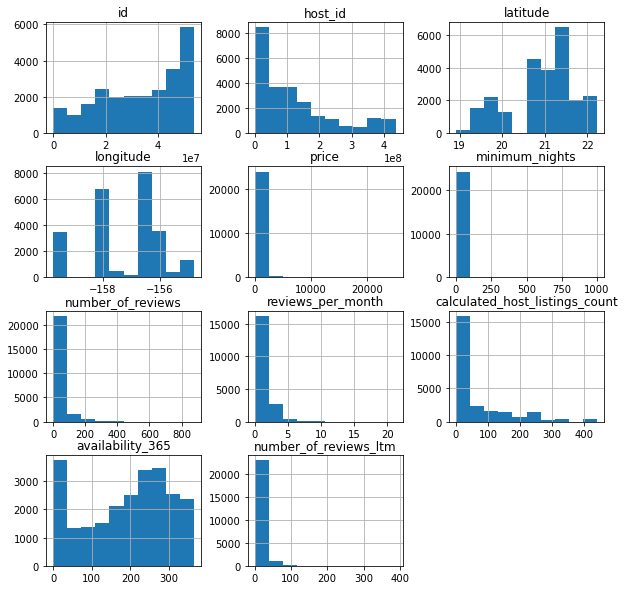

In [11]:
data.hist(bins=10, figsize=(10,10))


C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

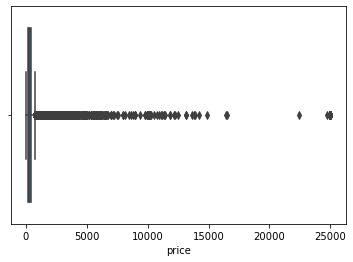

In [24]:
# want to identify the outlier in terms of price, minumum_nights, availability_365
# data.price.plot(kind='box', vert=False)
sns.boxplot(data.price)

In [60]:
# Define and fit the model

random_state=np.random.RandomState(42)
model = IsolationForest(bootstrap=True,
                        n_estimators=100,     # 100 trees
                        max_samples='auto',     # if auto, use min 256 ot n_samples
                        contamination=float(0.2),  # percentage of outliers needed
                        random_state=random_state)   # define a random_state

model.fit(data[['price','minimum_nights','availability_365']])

print(model.get_params())

{'bootstrap': True, 'contamination': 0.2, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x28AA7518740, 'verbose': 0, 'warm_start': False}


In [70]:
# Score the data and obtain the anomaly socres
data['scores']=model.decision_function(data[['price','minimum_nights','availability_365']])
                                            
data['anomaly_scores']=model.predict(data[['price','minimum_nights','availability_365']])
                                        
# print out the anomaly
print('Anomaly detected: {}'.format(len(data[data['anomaly_scores']==-1])), ' out of: {}'.format(len(data)), ' {}'.format(len(data[data['anomaly_scores']==-1])/len(data)))

#data['outlier']=ifnulldata[data['anomaly_scores']==-1]

display(data[data['anomaly_scores']==-1].head(10))       

# label outliers as true under 'Anomaly' field
label=lambda x: x==-1

data['Anomaly']=label(data.anomaly_scores)

Anomaly detected: 4858  out of: 24294  0.19996707005845066


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,scores,anomaly_scores
9,13527,Romantic Ocean Front,52967,Beth,Hawaii,North Kona,19.61632,-155.98305,Entire home/apt,169,30,7,2020-01-06,0.12,1,120,0,NaN,-0.035932,-1
13,13899,Deluxe Ocean Front View Condo Kaanapali Beach ...,54660,Dennis,Maui,Lahaina,20.94837,-156.69075,Entire home/apt,345,7,15,2021-08-08,0.28,9,0,3,NaN,-0.004479,-1
37,38944,Sunset Beach Treehouse Bungalow !!!,167085,John,Honolulu,North Shore Oahu,21.67348,-158.04001,Entire home/apt,180,30,254,2021-01-02,1.85,2,306,1,NaN,-0.018237,-1
38,39898,Sugar Shack 3 in the Ke'ei District,12729,Kelly,Hawaii,South Kona,19.46088,-155.88159,Entire home/apt,125,30,121,2021-12-06,0.88,3,209,5,TA-103-593-5744-01,-0.001679,-1
39,40298,"Scandinavian Chalet, Maui, Hawaii",173185,Steve & Jette,Maui,Paia-Haiku,20.91152,-156.22534,Entire home/apt,385,7,42,2021-10-31,0.36,1,24,10,"290050540001, TA-011-517-1328-01",-0.010159,-1
44,55000,"**Makaha Condo* 2 bedroom/office w/views, wifi...",259083,Morgan & Camille,Honolulu,Waianae,21.48099,-158.20431,Entire home/apt,99,30,56,2021-12-01,0.46,1,225,8,GE-138-741-2480-01,-0.001490,-1
55,71385,LUXURY GOLFCOURSE HOME W/3 SUITES,365193,Rhonda,Kauai,North Shore Kauai,22.21886,-159.47578,Entire home/apt,391,30,74,2021-08-24,0.58,1,320,3,54017007,-0.087311,-1
66,91091,Kauai Princeville Ocean Villas-1BR,492687,Tony,Kauai,North Shore Kauai,22.22260,-159.46890,Private room,550,1,7,2020-02-17,0.05,2,353,0,54005019,-0.000764,-1
68,104447,Waikiki Gem at Century Center,71120,Mike And Nicky,Honolulu,Primary Urban Center,21.29021,-157.83665,Entire home/apt,85,180,20,2021-08-01,0.21,5,365,1,TA-077-720-3712-01,-0.247224,-1
69,104452,"The ""Shangri La"" at Fairway Villa",71120,Mike And Nicky,Honolulu,Primary Urban Center,21.28042,-157.82317,Entire home/apt,88,30,41,2021-08-23,0.38,5,316,1,TA-077-720-3712-01,-0.036815,-1


In [ ]:
# Model Evaluation - *if it is supervised 
accuracy = 100*list(data['anomaly_scores']).count(-1)/(anomaly_count)

print("Accuracy of the model:", accuracy)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

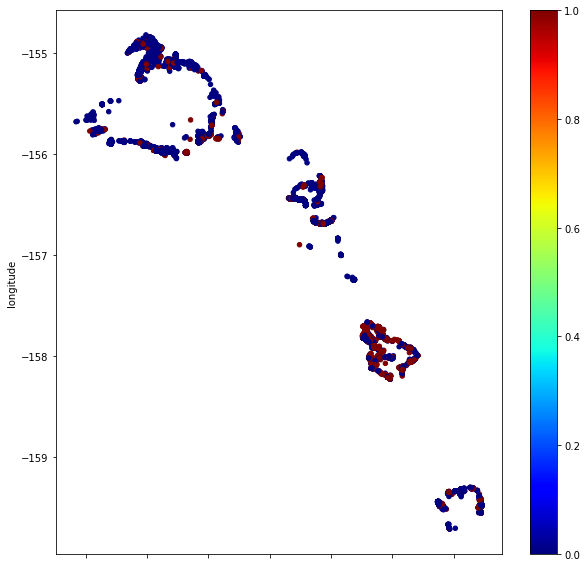

In [73]:
# physical location of anomaly rental properties

data.plot(kind='scatter',x='latitude', y='longitude',  c=data.Anomaly,  cmap=plt.get_cmap('jet'), figsize=(10,10))